In [2]:
import pandas as pd


In [5]:
# Importing training data set
X_train=pd.read_csv('D:\Data Science\Machine Learning\loan_prediction\X_train.csv')
y_train=pd.read_csv('D:\Data Science\Machine Learning\loan_prediction\Y_train.csv')

# Importing testing data set

X_test=pd.read_csv('D:\Data Science\Machine Learning\loan_prediction\X_test.csv')
y_test=pd.read_csv('D:\Data Science\Machine Learning\loan_prediction\Y_test.csv')

In [7]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [20]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,5149.718750,1572.077917,141.471354,342.093750,0.856771
std,5304.921764,2624.223119,75.176271,65.846658,0.350763
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3893.500000,1188.500000,128.000000,360.000000,1.000000
75%,5819.500000,2259.250000,164.250000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [21]:
X_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
dtype: object

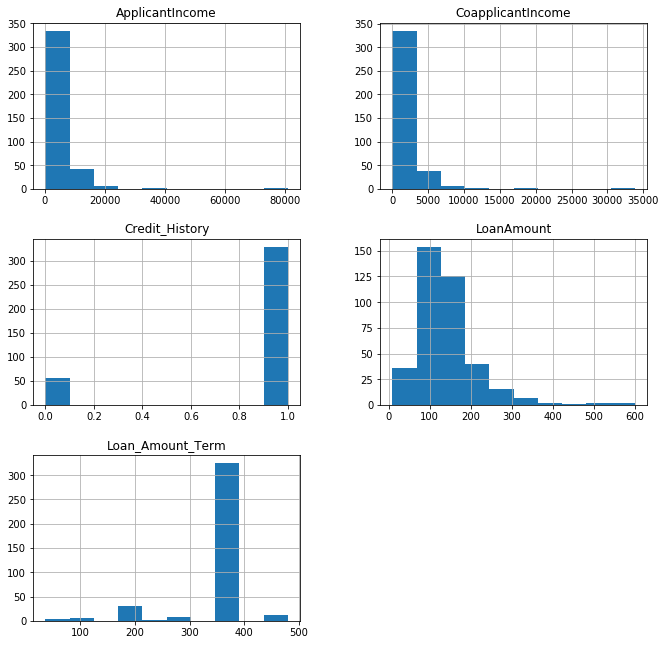

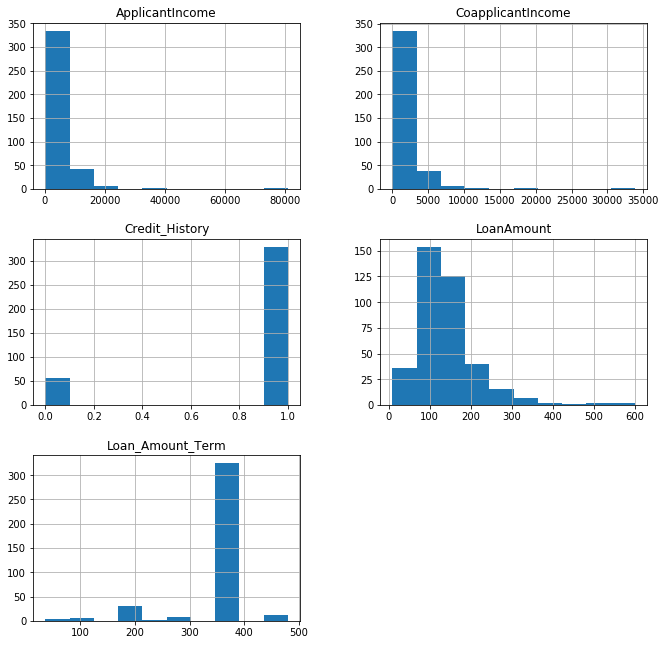

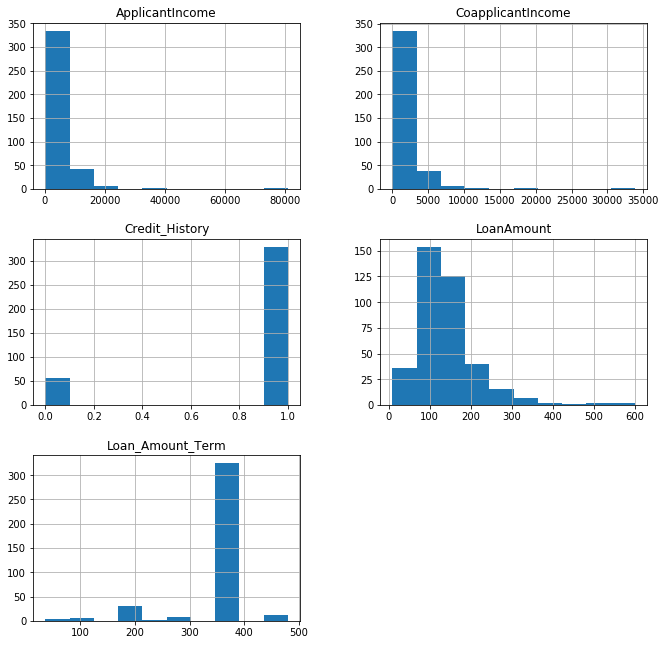

In [10]:
import matplotlib.pyplot as plt
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
plt.show()

In [17]:
X_train.dtypes.index.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], dtype=object)

 If we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling. Let’s do it practically.

In [24]:
# Initializing and Fitting a k-NN model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],y_train)

# Checking the performance of our model on the testing data set

from sklearn.metrics import accuracy_score

accuracy_score(y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.61458333333333337

In [28]:
y_train.Target.value_counts()/y_train.Target.count()


Y    0.705729
N    0.294271
Name: Target, dtype: float64

In [30]:
Y_test.Target.value_counts()/Y_test.Target.count()


Y    0.635417
N    0.364583
Name: Target, dtype: float64

In [32]:
# Importing MinMaxScaler and initializing it

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])


In [34]:
# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.75

In [40]:
#y_test.shape

# logistic regression

Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean. Standard scores (also called z scores).

lets standardize our data apply logistic regression on that. Sklearn provides scale to standardize the data.

In [47]:
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# Fitting logistic regression on our standardized data set

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)

# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

# One-Hot Encoding
One-Hot Encoding transforms each categorical feature with n possible values into n binary features, with only one active.

In [62]:

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)

X_train_1=X_train
X_test_1=X_test

columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']
for col in columns:
    # creating an exhaustive list of all possible categorical values
     data=X_train[[col]].append(X_test[[col]])
     enc.fit(data)
   

ValueError: could not convert string to float: 'Male'